# Install Pytorch from https://pytorch.org/get-started/locally/

In [1]:
!pip3 install torch torchvision

In [1]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.4360, 0.3423, 0.2762],
        [0.7500, 0.5324, 0.7864],
        [0.7680, 0.9400, 0.5376],
        [0.0781, 0.2755, 0.4892],
        [0.9277, 0.5231, 0.3238]])


In [3]:
print(torch.__version__)

1.9.0+cu102


In [4]:
import torchvision
print(torchvision.__version__)

0.10.0+cu102


# Basic PyTorch


In [1]:
import torch
import numpy as np

In [6]:
#Initializing a Tensor
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)#direct from data

In [7]:
#Tensors can be created from NumPy arrays
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [8]:
x_np

tensor([[1, 2],
        [3, 4]])

In [9]:
#From another tensor:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3162, 0.9285],
        [0.5036, 0.1970]]) 



In [10]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [12]:
tensor

tensor([[0.3464, 0.7189, 0.6279, 0.6824],
        [0.4492, 0.6863, 0.9361, 0.9277],
        [0.5922, 0.5892, 0.4129, 0.2866]], device='cuda:0')

In [13]:
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [14]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[0.1200, 0.5168, 0.3942, 0.4657],
        [0.2018, 0.4710, 0.8763, 0.8607],
        [0.3507, 0.3472, 0.1705, 0.0821]], device='cuda:0')

In [15]:
#If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

7.255912780761719 <class 'float'>


In [16]:
#In-place operations Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[0.3464, 0.7189, 0.6279, 0.6824],
        [0.4492, 0.6863, 0.9361, 0.9277],
        [0.5922, 0.5892, 0.4129, 0.2866]], device='cuda:0') 

tensor([[5.3464, 5.7189, 5.6279, 5.6824],
        [5.4492, 5.6863, 5.9361, 5.9277],
        [5.5922, 5.5892, 5.4129, 5.2866]], device='cuda:0')


In [18]:
#Tensors on the CPU and NumPy arrays can share their underlying memory locations
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# Fit a third order polynomial to sine function
ref: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id17


## Using Numpy

In [3]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

Training our model means updating our weights and biases, using the gradient of the loss with respect to these parameters: grad_loss/a, grad_loss/b, grad_loss/c, grad_loss/d

1.   grad_loss/a = grad_loss/grad_y * grad_y/grad_a = grad_y_pred
*   grad_loss/grad_y = grad_(y_pred-y)^2 = 2 * (y_pred-y) = grad_y_pred
*   grad_y/grad_a = 1

2.   grad_loss/b = grad_loss/grad_y * grad_y/grad_b = grad_y_pred * x
*   grad_y/grad_b = x

3.   grad_loss/c = grad_loss/grad_y * grad_y/grad_c = grad_y_pred * x^2
*   grad_y/grad_c = x^2

4.   grad_loss/d = grad_loss/grad_y * grad_y/grad_d = grad_y_pred * x^3
*   grad_y/grad_d = x^3









  
  


  


  


  


In [4]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 2704.630990678395
199 1791.6172092207717
299 1187.8303098362103
399 788.5362376877927
499 524.4747525535736
599 349.8440933998907
699 234.35542226828136
799 157.9785312588731
899 107.46723340201387
999 74.0616304069735
1099 51.96863329999901
1199 37.35713322267098
1299 27.693506167677235
1399 21.30217874536661
1499 17.075026314837288
1599 14.279194123154197
1699 12.430006038036353
1799 11.206916255898003
1899 10.39792586770205
1999 9.862823714775391
Result: y = -0.002546624150328384 + 0.8253939724170136 x + 0.0004393350419404195 x^2 + -0.08887156966062451 x^3


## Using Pytorch Tensor

In [5]:
#PyTorch Tensors can utilize GPUs to accelerate their numeric computations
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 318.9666748046875
199 215.37258911132812
299 146.44175720214844
399 100.55706024169922
499 70.00088500976562
599 49.643280029296875
699 36.0742301940918
799 27.025407791137695
899 20.987876892089844
999 16.957414627075195
1099 14.265287399291992
1199 12.466019630432129
1299 11.262716293334961
1399 10.457472801208496
1499 9.918219566345215
1599 9.556835174560547
1699 9.314489364624023
1799 9.151830673217773
1899 9.042561531066895
1999 8.969117164611816
Result: y = 0.007050747983157635 + 0.8466582894325256 x + -0.001216371078044176 x^2 + -0.09189623594284058 x^3


## Autograd

We can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients。. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

In [6]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 634.0364990234375
199 436.99639892578125
299 302.3916015625
399 210.33184814453125
499 147.29736328125
599 104.08721923828125
699 74.43286895751953
799 54.058372497558594
899 40.04411697387695
999 30.393878936767578
1099 23.741336822509766
1199 19.15045166015625
1299 15.978865623474121
1399 13.78552532196045
1499 12.267154693603516
1599 11.215006828308105
1699 10.485196113586426
1799 9.978507041931152
1899 9.62640380859375
1999 9.381498336791992
Result: y = -0.022344380617141724 + 0.8461494445800781 x + 0.003854779526591301 x^2 + -0.09182385355234146 x^3


Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level. When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In [7]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1), #torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
    torch.nn.Flatten(0, 1) #torch.nn.Flatten(start_dim=1, end_dim=-1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1196.42236328125
199 796.197998046875
299 530.9425048828125
399 355.11273193359375
499 238.54122924804688
599 161.24301147460938
699 109.97754669189453
799 75.97032928466797
899 53.406864166259766
999 38.432647705078125
1099 28.492874145507812
1199 21.89316177368164
1299 17.509977340698242
1399 14.598071098327637
1499 12.66296672821045
1599 11.376604080200195
1699 10.52121639251709
1799 9.952178955078125
1899 9.573487281799316
1999 9.32139778137207
Result: y = 0.008382523432374 + 0.8363150954246521 x + -0.0014461253304034472 x^2 + -0.09042500704526901 x^3


The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.



In [8]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 17306.95703125
199 6605.4892578125
299 1965.266357421875
399 376.6326599121094
499 67.86810302734375
599 42.26485824584961
699 36.94180679321289
799 30.957773208618164
899 23.898305892944336
999 17.004165649414062
1099 11.943888664245605
1199 9.503978729248047
1299 8.88857364654541
1399 8.834590911865234
1499 8.931175231933594
1599 8.831658363342285
1699 8.870916366577148
1799 8.878030776977539
1899 8.982465744018555
1999 8.965527534484863
Result: y = -0.0004978329525329173 + 0.8561474084854126 x + -0.0004978657816536725 x^2 + -0.09392453730106354 x^3


define your own Modules by subclassing nn.Module and defining a forward which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.

In [9]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 2149.70556640625
199 1470.2083740234375
299 1007.5223388671875
399 692.1107788085938
499 476.8498229980469
599 329.77142333984375
699 229.1632537841797
799 160.2637176513672
899 113.0250015258789
999 80.60042572021484
1099 58.3189697265625
1199 42.990352630615234
1299 32.43324661254883
1399 25.154510498046875
1499 20.130582809448242
1599 16.659332275390625
1699 14.258384704589844
1799 12.59603214263916
1899 11.443916320800781
1999 10.644678115844727
Result: y = -0.039336882531642914 + 0.8362022638320923 x + 0.006786266341805458 x^2 + -0.09040895849466324 x^3


#Use PyTorch to build a simple neural network

In [ ]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [ ]:
print(weights)

tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])


You can do the multiplication and sum in the same operation using a matrix multiplication. In general, you'll want to use matrix multiplications since they are more efficient and accelerated using modern libraries and high-performance computing on GPUs.

In [ ]:
# Now, make our labels from our data and true weights
y = activation(torch.sum(features * weights) + bias)
y

tensor([[0.1595]])

In [ ]:
print(features)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])


In [ ]:
print((features * weights))

tensor([[ 0.1314, -0.2796,  1.1668, -0.1540, -2.8442]])


In [ ]:
y = activation((features * weights).sum() + bias)
y

tensor([[0.1595]])

In [ ]:
y = activation(torch.mm(features, weights.view(5,1)) + bias)#weights.view(a, b) will return a new tensor with the same data as weights with size (a, b).
y

tensor([[0.1595]])

Another example

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [ ]:
print(W1)

tensor([[-1.1143,  1.6908],
        [-0.8948, -0.3556],
        [ 1.2324,  0.1382]])


In [ ]:
print(features)

tensor([[-0.1468,  0.7861,  0.9468]])


In [ ]:
print(torch.mm(features, W1))

tensor([[ 0.6270, -0.3969]])


In [ ]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.3171]])


Numpy to Torch and back

In [ ]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.02020965, 0.33853226, 0.93391586],
       [0.56020857, 0.481601  , 0.36847533],
       [0.85955547, 0.44864542, 0.47199414],
       [0.54630808, 0.42206903, 0.36997061]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.0202, 0.3385, 0.9339],
        [0.5602, 0.4816, 0.3685],
        [0.8596, 0.4486, 0.4720],
        [0.5463, 0.4221, 0.3700]], dtype=torch.float64)

In [ ]:
b.numpy()

array([[0.02020965, 0.33853226, 0.93391586],
       [0.56020857, 0.481601  , 0.36847533],
       [0.85955547, 0.44864542, 0.47199414],
       [0.54630808, 0.42206903, 0.36997061]])

In [ ]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[0.0404, 0.6771, 1.8678],
        [1.1204, 0.9632, 0.7370],
        [1.7191, 0.8973, 0.9440],
        [1.0926, 0.8441, 0.7399]], dtype=torch.float64)

#Neural networks with PyTorch

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [ ]:
!pwd

/content


Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('/content/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
#The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again.


Extracting /content/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST_data/MNIST/raw



Extracting /content/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST_data/MNIST/raw
Processing...
Done!


I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


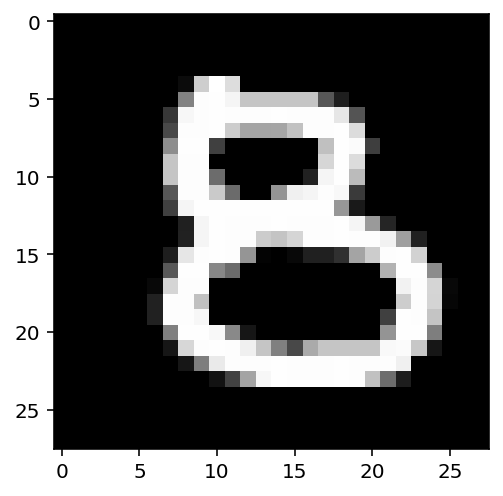

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

We'll see how to do it using PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape (64, 1, 28, 28) to a have a shape of (64, 784), 784 is 28 times 28. This is typically called flattening, we flattened the 2D images into 1D vectors.
Previously you built a network with one output unit. Here we need 10 output units, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image.

In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)#(64, 1, 28, 28) to (64, 784)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [ ]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [ ]:
print(probabilities.sum(dim=0))

tensor([4.2316e+00, 2.2374e+01, 2.3805e-04, 2.0477e-02, 1.5087e-04, 2.1441e+01,
        1.8832e-04, 1.9745e+00, 2.5309e+00, 1.1427e+01])


PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
  #inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. 
  #It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        # creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs
        self.hidden = nn.Linear(784, 256)
        #You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

        #this creates another linear transformation with 256 inputs and 10 outputs.
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        #Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.
        
    #PyTorch networks created with nn.Module must have a forward method defined. 
    #It takes in a tensor x and passes it through the operations you defined in the __init__ method.
    def forward(self, x):
        # Pass the input tensor through each of our operations
        #Here the input tensor x is passed through each operation a reassigned to x.
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [ ]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

You can define the network somewhat more concisely and clearly using the torch.nn.functional module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as F, import torch.nn.functional as F.


In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

Another model

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.
ReLU function is used almost exclusively as the activation function for hidden layers.
The only requirement is that for a network to approximate a non-linear function, the activation functions must be non-linear.  Here are a few more examples of common activation functions: Tanh (hyperbolic tangent), and ReLU (rectified linear unit).

initializing weights and biases: The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.



In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0053,  0.0095,  0.0104,  ..., -0.0226,  0.0165,  0.0120],
        [-0.0142, -0.0229, -0.0197,  ...,  0.0299, -0.0270, -0.0269],
        [-0.0248,  0.0253,  0.0324,  ..., -0.0175, -0.0339,  0.0020],
        ...,
        [ 0.0054,  0.0103,  0.0017,  ..., -0.0147, -0.0111, -0.0241],
        [ 0.0340, -0.0104,  0.0198,  ..., -0.0157, -0.0128, -0.0336],
        [-0.0086, -0.0058,  0.0136,  ...,  0.0086,  0.0153,  0.0127]],
       requires_grad=True)
Parameter containing:
tensor([-0.0080, -0.0018,  0.0310,  0.0209, -0.0279,  0.0038,  0.0211, -0.0280,
        -0.0354, -0.0346,  0.0077,  0.0270,  0.0150, -0.0330,  0.0125,  0.0229,
        -0.0355, -0.0016,  0.0294,  0.0053,  0.0350,  0.0210,  0.0011,  0.0176,
         0.0002, -0.0127, -0.0130, -0.0164, -0.0134, -0.0212, -0.0277,  0.0214,
         0.0184,  0.0059, -0.0313, -0.0188,  0.0225,  0.0299,  0.0299,  0.0047,
        -0.0238, -0.0196,  0.0241,  0.0200, -0.0347, -0.0111,  0.0093, -0.0025,
        -0.0106

For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [ ]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-2.6965e-02,  3.2594e-03,  7.2188e-03,  ...,  2.4345e-03,
          5.3860e-04,  3.9906e-03],
        [-4.0252e-03, -9.4899e-03,  1.6548e-02,  ...,  9.1848e-03,
          8.1340e-03, -6.1363e-04],
        [ 9.9076e-04,  7.7060e-04, -9.5502e-04,  ...,  6.8196e-03,
         -5.0805e-03,  1.7135e-02],
        ...,
        [ 1.4525e-02,  1.1392e-02, -7.0820e-03,  ...,  6.6372e-03,
          8.9632e-03, -3.5935e-04],
        [-8.3963e-03, -1.1518e-02, -1.4619e-02,  ..., -1.8183e-05,
         -9.8635e-03, -2.0011e-03],
        [ 1.0964e-02, -3.1923e-03, -6.5580e-03,  ...,  6.6183e-03,
         -1.7163e-02,  1.0629e-03]])

Now that we have a network, let's see what happens when we pass in an image.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [ ]:

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]



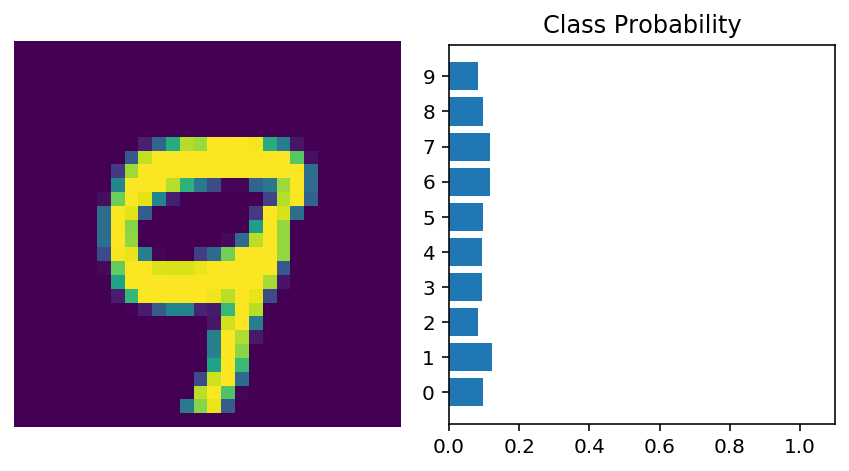

In [ ]:
view_classify(img.view(1, 28, 28), ps)

Using nn.Sequential: PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential (documentation). Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


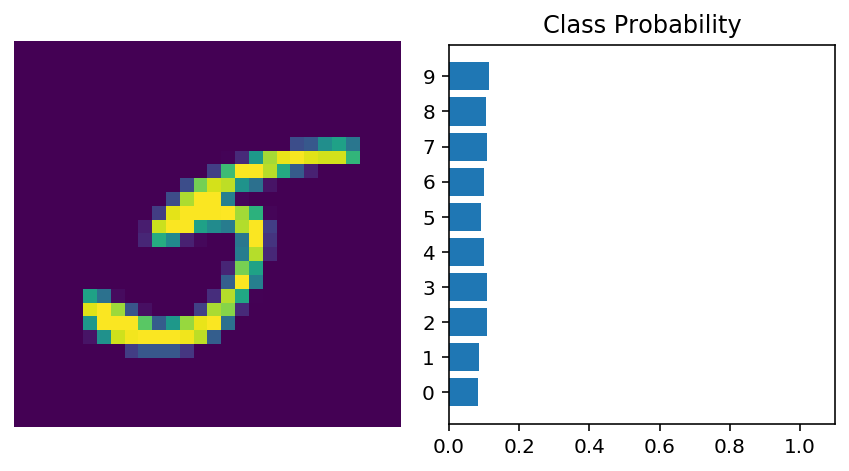

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use model[0].

In [ ]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0152, -0.0294,  0.0026,  ...,  0.0148,  0.0261, -0.0223],
        [ 0.0032,  0.0163,  0.0208,  ..., -0.0124, -0.0124,  0.0186],
        [ 0.0315, -0.0142, -0.0310,  ..., -0.0192, -0.0179,  0.0007],
        ...,
        [-0.0064, -0.0138, -0.0133,  ..., -0.0205, -0.0312,  0.0161],
        [ 0.0131,  0.0127, -0.0273,  ...,  0.0140, -0.0335, -0.0295],
        [ 0.0213, -0.0146, -0.0260,  ..., -0.0235,  0.0335, -0.0196]],
       requires_grad=True)

You can also pass in an OrderedDict to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so each operation must have a different name.

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now you can access layers either by integer or the name

In [ ]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


#Training Neural Networks

Training the network!

it's more convenient to build the model with a log-softmax output using nn.LogSoftmax or F.log_softmax (documentation). Then you can get the actual probabilites by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss (documentation).

In [ ]:
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.91916799659668
Training loss: 0.8666147714230552
Training loss: 0.5323591251363123
Training loss: 0.4345304797421386
Training loss: 0.3882274371283903


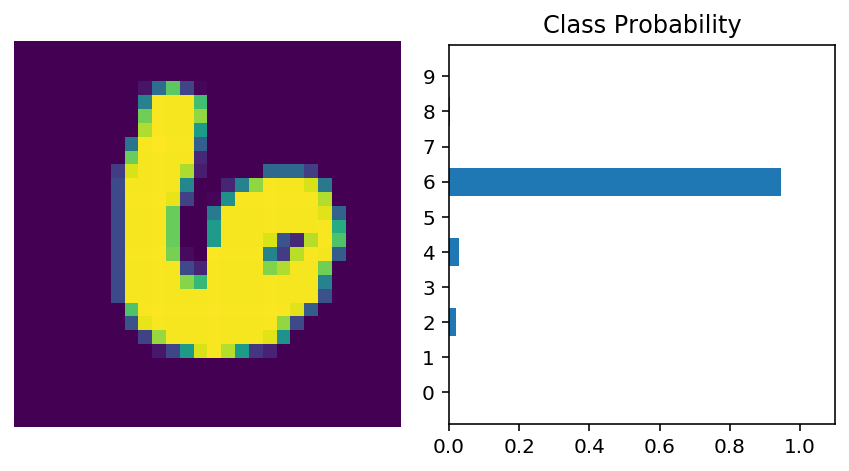

In [ ]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

#Fashion Dataset

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('./F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting ./F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



Extracting ./F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



Extracting ./F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw



Extracting ./F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [ ]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[4],
        [8],
        [8],
        [2],
        [9],
        [4],
        [8],
        [8],
        [8],
        [4]])


In [ ]:
equals = top_class == labels.view(*top_class.shape)

In [ ]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 17.1875%


Since we're not updating our parameters in the validation pass, we can speed up the by turning off gradients using torch.no_grad()

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.521..  Test Loss: 0.448..  Test Accuracy: 0.836
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.429..  Test Accuracy: 0.843
Epoch: 3/30..  Training Loss: 0.357..  Test Loss: 0.392..  Test Accuracy: 0.860
Epoch: 4/30..  Training Loss: 0.333..  Test Loss: 0.393..  Test Accuracy: 0.857
Epoch: 5/30..  Training Loss: 0.311..  Test Loss: 0.370..  Test Accuracy: 0.866
Epoch: 6/30..  Training Loss: 0.303..  Test Loss: 0.383..  Test Accuracy: 0.862
Epoch: 7/30..  Training Loss: 0.290..  Test Loss: 0.385..  Test Accuracy: 0.862
Epoch: 8/30..  Training Loss: 0.282..  Test Loss: 0.373..  Test Accuracy: 0.871
Epoch: 9/30..  Training Loss: 0.273..  Test Loss: 0.373..  Test Accuracy: 0.876
Epoch: 10/30..  Training Loss: 0.262..  Test Loss: 0.362..  Test Accuracy: 0.874
Epoch: 11/30..  Training Loss: 0.258..  Test Loss: 0.376..  Test Accuracy: 0.870
Epoch: 12/30..  Training Loss: 0.253..  Test Loss: 0.368..  Test Accuracy: 0.882
Epoch: 13/30..  Training Loss: 0.245.

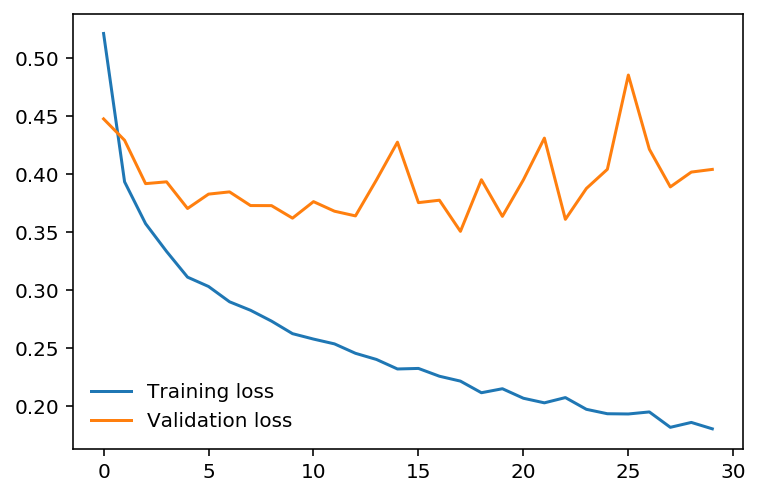

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)